In [7]:
# Cell 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
# Cell 2: Load and Prepare the Data
try:
    # Load the dataset
    df = pd.read_csv('isl_player_final.csv')
    print("Dataset loaded successfully.")
    
    # Display the first few rows of the dataframe
    print("Data Head:")
    print(df.head())

    # For simplicity, fill missing numerical values with 0.
    numerical_cols = df.select_dtypes(include=['number']).columns
    df[numerical_cols] = df[numerical_cols].fillna(0)
    print("\nMissing numerical values filled with 0.")

except FileNotFoundError:
    print("Error: 'isl_player_final.csv' not found. Please make sure the file is in the same directory as the script.")
except Exception as e:
    print(f"An error occurred during data loading: {e}")

Dataset loaded successfully.
Data Head:
   tour_id tour_name    id  jersey_no                   name  \
0      148      ISL6  1514          3           Asamoah Gyan   
1      148      ISL6  2475         26   Deshorn Dwayne Brown   
2      148      ISL6  2900          9         Amine Chermiti   
3      148      ISL6  3753          7  Francisco Medina Luna   
4      148      ISL6  3809          4     Rafael Lopez Gomez   

           short_name  position_id    position position_short  team_id  ...  \
0        Asamoah Gyan            2     Forward            FWD      504  ...   
1       Deshorn Brown            2     Forward            FWD      656  ...   
2      Amine Chermiti            2     Forward            FWD      506  ...   
3                Piti            3  Midfielder             MF     1159  ...   
4  Rafael Lopez Gomez            1    Defender            DEF     1536  ...   

  goaltenders.catches goaltenders.punches  \
0                   0                   0   
1         


--- Starting Exploratory Data Analysis ---
Displaying plot: Distribution of Player Positions


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14228\833370522.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='position', order=df['position'].value_counts().index, palette='viridis')


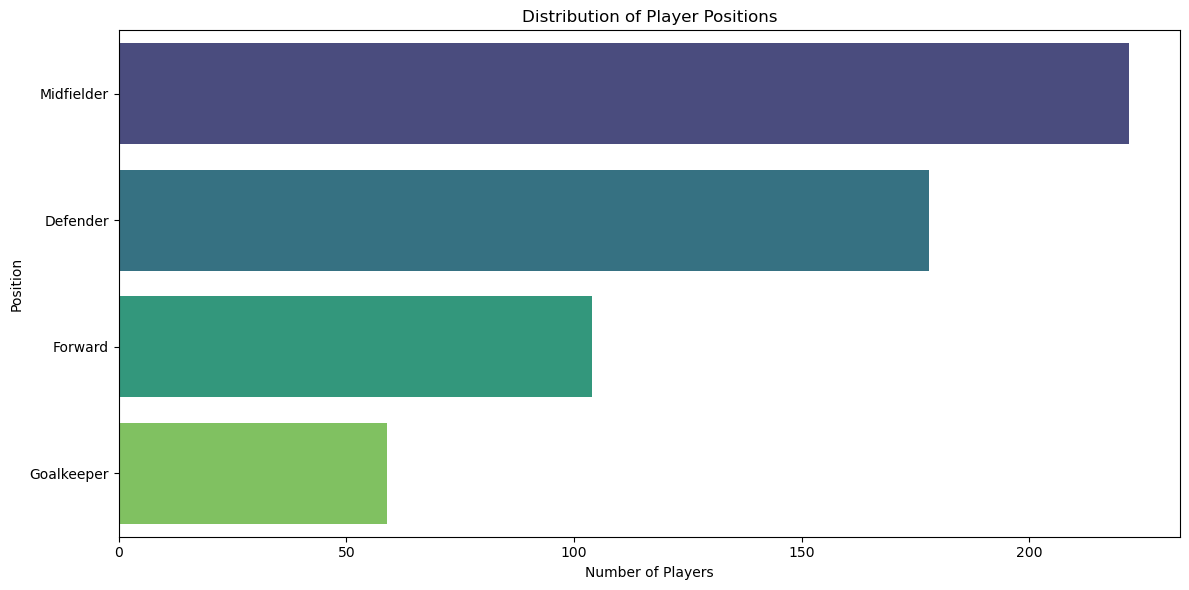

In [9]:
# Cell 3: Exploratory Data Analysis (EDA) - Position Distribution
print("\n--- Starting Exploratory Data Analysis ---")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='position', order=df['position'].value_counts().index, palette='viridis')
plt.title('Distribution of Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Position')
plt.tight_layout()
print("Displaying plot: Distribution of Player Positions")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14228\2343327186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scorers, x='events.goals', y='name', palette='plasma')


Displaying plot: Top 15 Goal Scorers


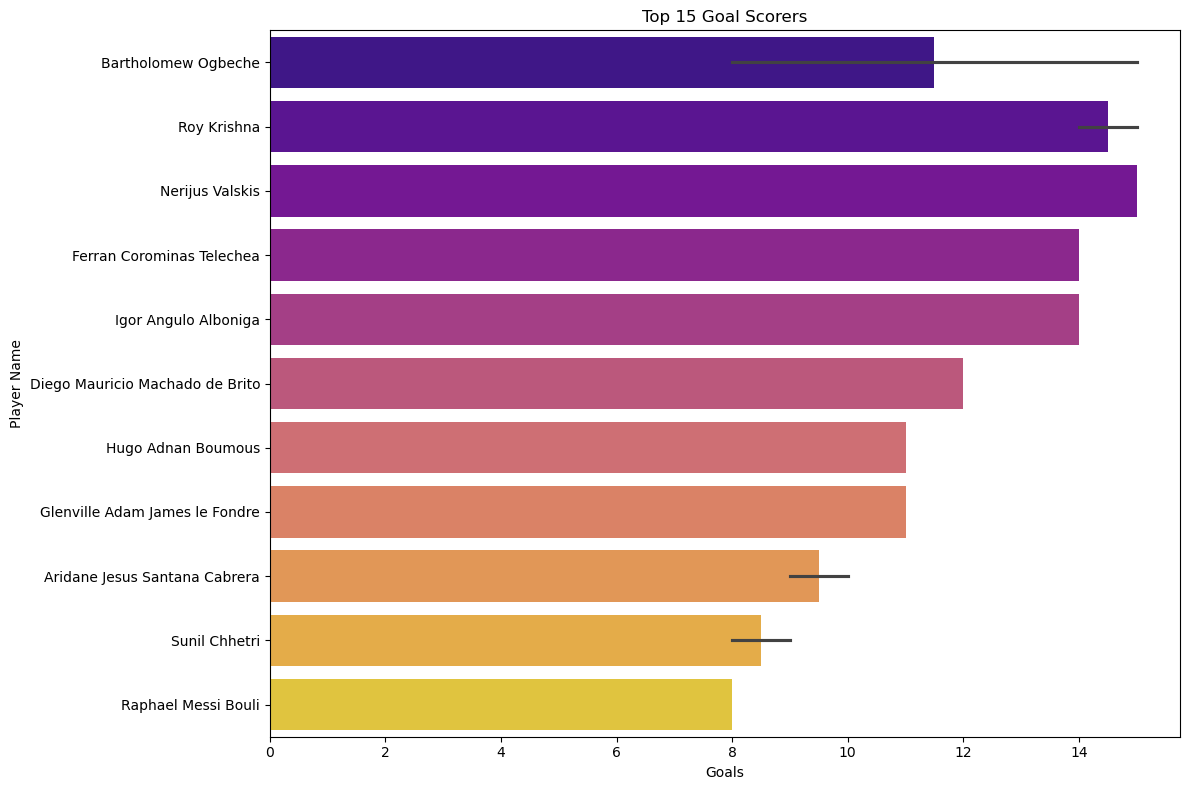

In [10]:
# Cell 4: EDA - Top Goal Scorers
# We filter for players who have scored at least one goal
top_scorers = df[df['events.goals'] > 0].sort_values(by='events.goals', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_scorers, x='events.goals', y='name', palette='plasma')
plt.title('Top 15 Goal Scorers')
plt.xlabel('Goals')
plt.ylabel('Player Name')
plt.tight_layout()
print("Displaying plot: Top 15 Goal Scorers")
plt.show()

In [11]:
# Cell 5: Data Preprocessing for Model
print("\n--- Preparing Data for Machine Learning Model ---")
# Drop non-player-performance columns and identifiers that we won't use for training
cols_to_drop = [
    'tour_id', 'tour_name', 'id', 'jersey_no', 'name', 'short_name',
    'position_id', 'position_short', 'team_id', 'team_name', 'team_short_name'
]
df_model = df.drop(columns=cols_to_drop)

# The target variable we want to predict is 'position'
target = 'position'

# Ensure the target variable has no missing values
df_model = df_model.dropna(subset=[target])

# Define the features (X) and the target (y)
# FIX: Select only numerical columns for X to prevent the ValueError
X = df_model.select_dtypes(include=['number'])
y = df_model[target]

# Encode the categorical target variable 'position' into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Data has been preprocessed and is ready for training.")


--- Preparing Data for Machine Learning Model ---
Data has been preprocessed and is ready for training.


In [12]:
# Cell 6: Train the Machine Learning Model
print("\n--- Training the Model ---")
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete.")



--- Training the Model ---
Model training complete.


In [13]:
# --- CELL BREAK ---

# Cell 7: Evaluate the Model
print("\n--- Evaluating the Model ---")
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


--- Evaluating the Model ---
Model Accuracy: 0.65

Classification Report:
              precision    recall  f1-score   support

    Defender       0.74      0.64      0.69        36
     Forward       0.58      0.33      0.42        21
  Goalkeeper       0.91      0.83      0.87        12
  Midfielder       0.58      0.77      0.66        44

    accuracy                           0.65       113
   macro avg       0.70      0.64      0.66       113
weighted avg       0.67      0.65      0.65       113




--- Visualizing Feature Importances ---


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14228\470332386.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='rocket')


Displaying plot: Top 20 Most Important Features


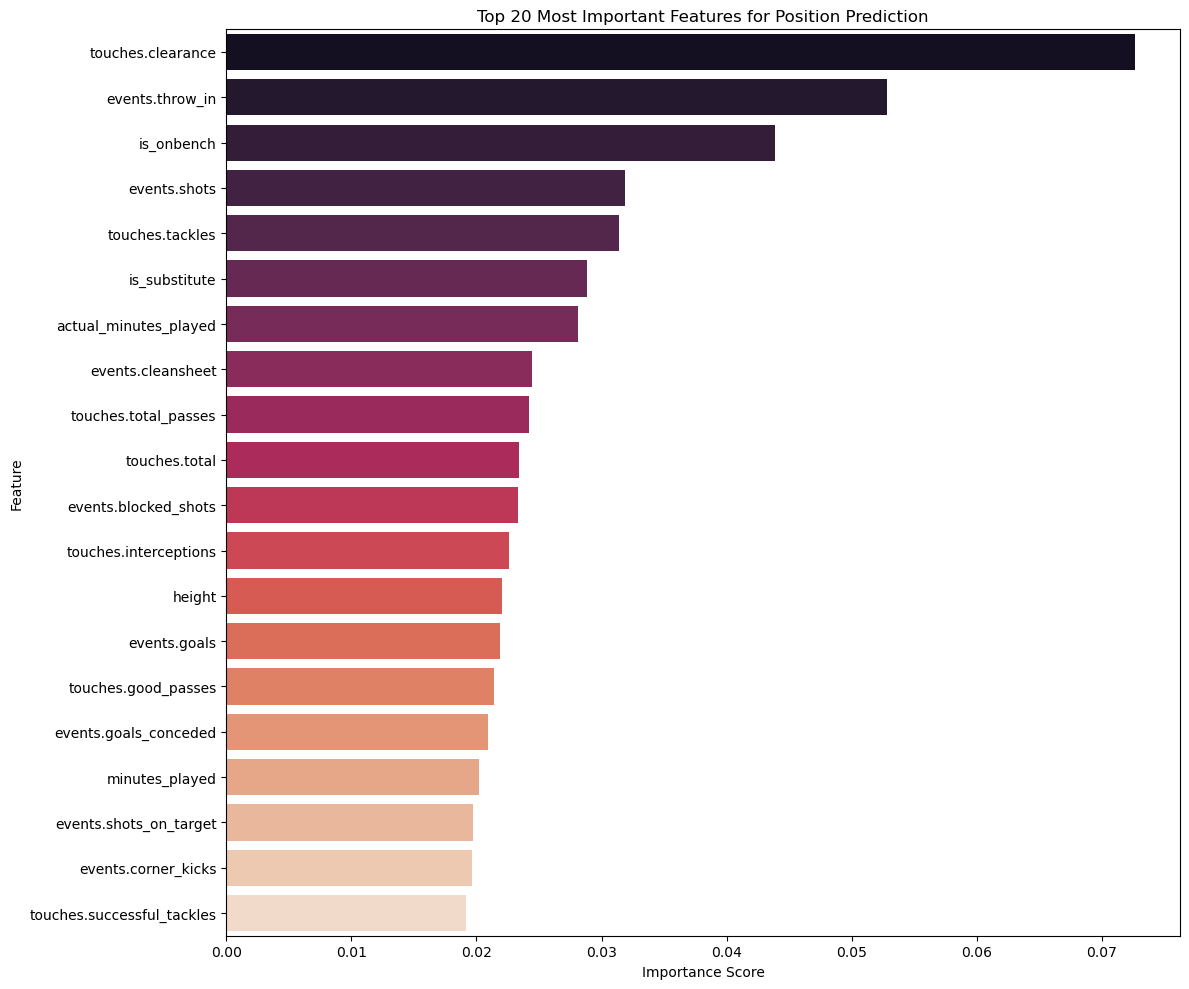

In [14]:
# Cell 8: Visualize Feature Importances
print("\n--- Visualizing Feature Importances ---")
# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe for feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(20) # Top 20 features

plt.figure(figsize=(12, 10))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='rocket')
plt.title('Top 20 Most Important Features for Position Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
print("Displaying plot: Top 20 Most Important Features")
plt.show()

In [15]:

# Cell 9: Save Predictions for Power BI (Optional)
print("\n--- Saving Final Predictions ---")
# Predict positions for the entire dataset
full_dataset_predictions_encoded = model.predict(X)
# Decode the predictions back to original position names
full_dataset_predictions = le.inverse_transform(full_dataset_predictions_encoded)

# Add the predictions to the original dataframe
df['predicted_position'] = full_dataset_predictions

# Save the dataframe with predictions to a new CSV file
output_path_predictions = 'isl_player_predictions.csv'
df.to_csv(output_path_predictions, index=False)
print(f"Successfully saved predictions to '{output_path_predictions}'")


--- Saving Final Predictions ---
Successfully saved predictions to 'isl_player_predictions.csv'
